In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('customer_churn (1).csv')

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.shape

(7043, 21)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### A) Data Manipulation: 
##### a. Find the total number of male customers 
##### b. Find the total number of customers whose Internet Service is ‘DSL’
##### c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
##### d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [41]:
# a

sum(df['gender'] == 'Male')

3555

In [42]:
#b

sum(df['InternetService'] == 'DSL') 

2421

In [43]:
#c

new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

In [44]:
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [45]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [46]:
#d

new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

In [47]:
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


### B) Data Visualization: 
##### a. Build a pie-chart to show the distribution of customers would be churning out
##### b. Build a bar-plot to show the distribution of ‘Internet Service’


In [48]:
#a

names = df["Churn"].value_counts().keys().tolist()
sizes = df['Churn'].value_counts().tolist()

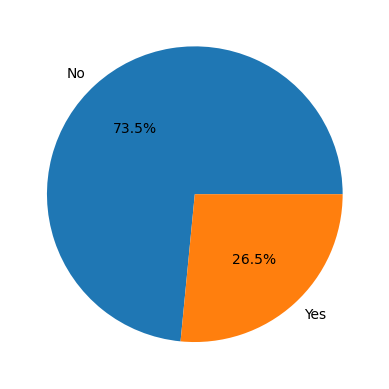

In [49]:
plt.pie(sizes, labels =names, autopct = '%0.1f%%')
plt.show()

In [50]:
#b

names = df['InternetService'].value_counts().keys().tolist()
sizes = df['InternetService'].value_counts().tolist()

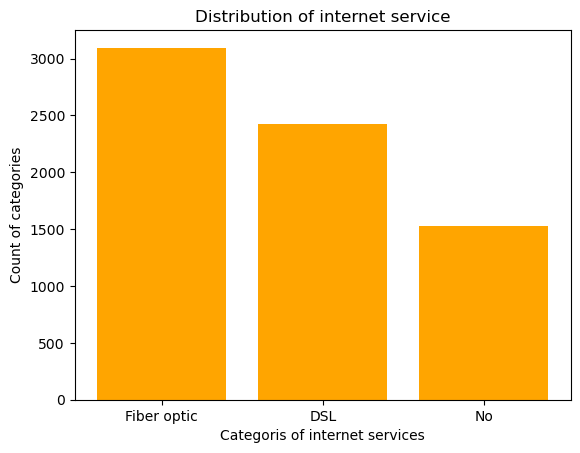

In [51]:
plt.bar(names, sizes, color = 'orange')
plt.xlabel("Categoris of internet services")
plt.ylabel("Count of categories")
plt.title("Distribution of internet service")
plt.show()

### C) Model Building: 
##### a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
###### i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
###### ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
###### iii. Use ‘Adam’ as the optimization algorithm 
###### iv. Fit the model on the train set, with number of epochs to be 150
###### v. Predict the values on the test set and build a confusion matrix 
###### vi. Plot the ‘Accuracy vs Epochs’ graph

In [52]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


In [53]:
# Assuming 'Yes/No' column is the one causing the issue
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [54]:
#a
x = df[['tenure']]
y = df[['Churn']]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 42)

In [56]:
model =Sequential()
model.add(Dense(12, input_dim = 1, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4672/4930 [===========================>..] - ETA: 0s - loss: 1.1004 - accuracy: 0.7412

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4930/4930 [==============================] - 1s 129us/sample - loss: 1.0709 - accuracy: 0.7404 - val_loss: 0.5123 - val_accuracy: 0.7463
Epoch 2/150
4930/4930 [==============================] - 0s 83us/sample - loss: 0.5170 - accuracy: 0.7564 - val_loss: 0.5129 - val_accuracy: 0.7549
Epoch 3/150
4930/4930 [==============================] - 0s 77us/sample - loss: 0.5162 - accuracy: 0.7542 - val_loss: 0.5208 - val_accuracy: 0.7539
Epoch 4/150
4930/4930 [==============================] - 0s 75us/sample - loss: 0.5150 - accuracy: 0.7552 - val_loss: 0.5101 - val_accuracy: 0.7539
Epoch 5/150
4930/4930 [==============================] - 0s 75us/sample - loss: 0.5133 - accuracy: 0.7379 - val_loss: 0.5135 - val_accuracy: 0.7269
Epoch 6/150
4930/4930 [==============================] - 0s 77us/sample - loss: 0.5193 - accuracy: 0.7353 - val_loss: 0.5100 - val_accuracy: 0.7269
Epoch 7/150
4930/4930 [==============================] - 0s 54us/sample - loss: 0.5145 - accuracy: 0.7373 - val_loss: 0.511

Epoch 111/150
4930/4930 [==============================] - 0s 60us/sample - loss: 0.5099 - accuracy: 0.7542 - val_loss: 0.5095 - val_accuracy: 0.7549
Epoch 112/150
4930/4930 [==============================] - 0s 54us/sample - loss: 0.5093 - accuracy: 0.7538 - val_loss: 0.5082 - val_accuracy: 0.7511
Epoch 113/150
4930/4930 [==============================] - 0s 58us/sample - loss: 0.5091 - accuracy: 0.7544 - val_loss: 0.5115 - val_accuracy: 0.7511
Epoch 114/150
4930/4930 [==============================] - 0s 50us/sample - loss: 0.5100 - accuracy: 0.7564 - val_loss: 0.5077 - val_accuracy: 0.7511
Epoch 115/150
4930/4930 [==============================] - 0s 58us/sample - loss: 0.5091 - accuracy: 0.7556 - val_loss: 0.5078 - val_accuracy: 0.7511
Epoch 116/150
4930/4930 [==============================] - 0s 54us/sample - loss: 0.5086 - accuracy: 0.7548 - val_loss: 0.5076 - val_accuracy: 0.7511
Epoch 117/150
4930/4930 [==============================] - 0s 57us/sample - loss: 0.5083 - accuracy:

In [57]:
np.mean(model.history.history['val_accuracy'])

0.7373497366905213

In [58]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)
from sklearn.metrics import confusion_matrix


C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [59]:
confusion_matrix(y_test, y_pred)

array([[1392,  147],
       [ 379,  195]], dtype=int64)

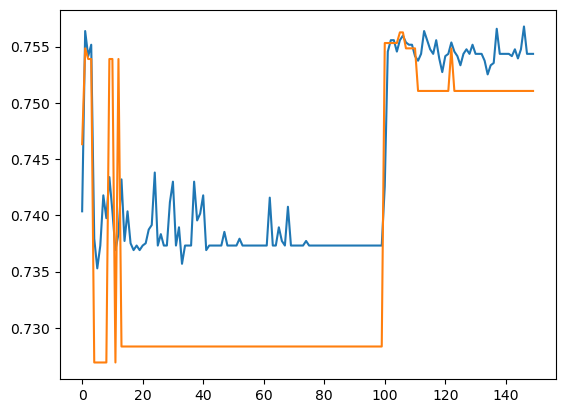

In [60]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

##### b. Build the 2nd model using same target and feature variables: 
###### i. Add a drop-out layer after the input layer with drop-out value of 0.3 
###### ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2 
###### iii. Predict the values on the test set and build a confusion matrix 
###### iv. Plot the ‘Accuracy vs Epochs’ graph

In [61]:
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(12, input_dim = 1, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [62]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 150, validation_data = (x_test, y_test))

Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 1s 127us/sample - loss: 1.8889 - accuracy: 0.6197 - val_loss: 0.9468 - val_accuracy: 0.7283


C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 2/150
4930/4930 [==============================] - 0s 65us/sample - loss: 1.0228 - accuracy: 0.6722 - val_loss: 0.6564 - val_accuracy: 0.7283
Epoch 3/150
4930/4930 [==============================] - 0s 68us/sample - loss: 0.7790 - accuracy: 0.6811 - val_loss: 0.5139 - val_accuracy: 0.7283
Epoch 4/150
4930/4930 [==============================] - 0s 65us/sample - loss: 0.6557 - accuracy: 0.6951 - val_loss: 0.5196 - val_accuracy: 0.7283
Epoch 5/150
4930/4930 [==============================] - 0s 67us/sample - loss: 0.6069 - accuracy: 0.7116 - val_loss: 0.5514 - val_accuracy: 0.7283
Epoch 6/150
4930/4930 [==============================] - 0s 64us/sample - loss: 0.5939 - accuracy: 0.7174 - val_loss: 0.5493 - val_accuracy: 0.7283
Epoch 7/150
4930/4930 [==============================] - 0s 70us/sample - loss: 0.5830 - accuracy: 0.7252 - val_loss: 0.5512 - val_accuracy: 0.7283
Epoch 8/150
4930/4930 [==============================] - 0s 62us/sample - loss: 0.5679 - accuracy: 0.7296 - val_

4930/4930 [==============================] - 0s 75us/sample - loss: 0.5185 - accuracy: 0.7535 - val_loss: 0.5204 - val_accuracy: 0.7549
Epoch 58/150
4930/4930 [==============================] - 0s 67us/sample - loss: 0.5185 - accuracy: 0.7513 - val_loss: 0.5180 - val_accuracy: 0.7549
Epoch 59/150
4930/4930 [==============================] - 0s 68us/sample - loss: 0.5202 - accuracy: 0.7533 - val_loss: 0.5128 - val_accuracy: 0.7549
Epoch 60/150
4930/4930 [==============================] - 0s 72us/sample - loss: 0.5211 - accuracy: 0.7497 - val_loss: 0.5154 - val_accuracy: 0.7549
Epoch 61/150
4930/4930 [==============================] - 0s 63us/sample - loss: 0.5158 - accuracy: 0.7546 - val_loss: 0.5159 - val_accuracy: 0.7549
Epoch 62/150
4930/4930 [==============================] - 0s 70us/sample - loss: 0.5209 - accuracy: 0.7497 - val_loss: 0.5152 - val_accuracy: 0.7549
Epoch 63/150
4930/4930 [==============================] - 0s 68us/sample - loss: 0.5187 - accuracy: 0.7497 - val_loss: 

Epoch 112/150
4930/4930 [==============================] - 0s 74us/sample - loss: 0.5145 - accuracy: 0.7533 - val_loss: 0.5143 - val_accuracy: 0.7549
Epoch 113/150
4930/4930 [==============================] - 0s 78us/sample - loss: 0.5174 - accuracy: 0.7503 - val_loss: 0.5127 - val_accuracy: 0.7549
Epoch 114/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5186 - accuracy: 0.7485 - val_loss: 0.5160 - val_accuracy: 0.7549
Epoch 115/150
4930/4930 [==============================] - 0s 78us/sample - loss: 0.5171 - accuracy: 0.7501 - val_loss: 0.5143 - val_accuracy: 0.7549
Epoch 116/150
4930/4930 [==============================] - 0s 73us/sample - loss: 0.5179 - accuracy: 0.7523 - val_loss: 0.5170 - val_accuracy: 0.7549
Epoch 117/150
4930/4930 [==============================] - 0s 70us/sample - loss: 0.5185 - accuracy: 0.7507 - val_loss: 0.5181 - val_accuracy: 0.7549
Epoch 118/150
4930/4930 [==============================] - 0s 68us/sample - loss: 0.5191 - accuracy:

In [67]:
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_binary)

array([[1426,  113],
       [ 405,  169]], dtype=int64)

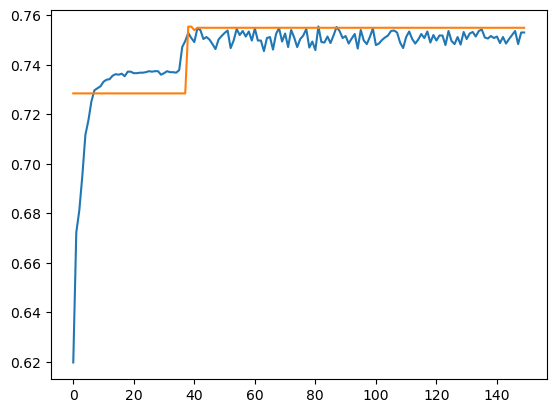

In [69]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

In [70]:
np.mean(model.history.history['val_accuracy'])

0.7481369296709697

####  c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and  ‘Churn’ as the dependent/target column: 
###### i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
###### ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
###### iii. Use ‘Adam’ as the optimization algorithm
###### iv. Fit the model on the train set, with number of epochs to be 150 
###### v. Predict the values on the test set and build a confusion matrix 
###### vi. Plot the ‘Accuracy vs Epochs’ graph.

In [103]:
x = df[[ 'MonthlyCharges', 'tenure', 'TotalCharges']]
y = df[['Churn']]

In [104]:
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [105]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [116]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [117]:
model = Sequential()

In [102]:
np.mean(model.history.history['val_accuracy'])

0.0

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'Churn' is your target variable
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Assuming 'tenure', 'TotalCharges', and 'MonthlyCharges' are your features
X = df[['tenure', 'TotalCharges', 'MonthlyCharges']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test))


Train on 5634 samples, validate on 1409 samples
Epoch 1/150
5152/5634 [==========================>...] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5634/5634 [==============================] - 2s 301us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/150
5634/5634 [==============================] - 0s 77us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/150
5634/5634 [==============================] - 1s 89us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/150
5634/5634 [==============================] - 1s 177us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/150
5634/5634 [==============================] - 1s 108us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/150
5634/5634 [==============================] - 1s 103us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/150
5634/5634 [==============================] - 1s 104us/sample - loss: nan - accuracy: 0.0000e+00 

5634/5634 [==============================] - 0s 58us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 110/150
5634/5634 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 111/150
5634/5634 [==============================] - 0s 51us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 112/150
5634/5634 [==============================] - 0s 56us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 113/150
5634/5634 [==============================] - 0s 55us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 114/150
5634/5634 [==============================] - 0s 61us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 115/150
5634/5634 [==============================] - 0s 57us/sample - loss: nan - accuracy: 0.00

In [121]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'Churn' is your target variable
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Assuming 'tenure', 'TotalCharges', and 'MonthlyCharges' are your features
X = df[['tenure', 'TotalCharges', 'MonthlyCharges']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape the data
x_train_reshaped = x_train_scaled.reshape((len(x_train), 3))
x_test_reshaped = x_test_scaled.reshape((len(x_test), 3))

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(x_train_reshaped, y_train, epochs=150, validation_data=(x_test_reshaped, y_test))


Train on 5634 samples, validate on 1409 samples
Epoch 1/150
4768/5634 [========================>.....] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5634/5634 [==============================] - 1s 114us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/150
5634/5634 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/150
5634/5634 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/150
5634/5634 [==============================] - 0s 56us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/150
5634/5634 [==============================] - 0s 56us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/150
5634/5634 [==============================] - 0s 54us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/150
5634/5634 [==============================] - 0s 59us/sample - loss: nan - accuracy: 0.0000e+00 - va

5634/5634 [==============================] - 0s 46us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 110/150
5634/5634 [==============================] - 0s 49us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 111/150
5634/5634 [==============================] - 0s 48us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 112/150
5634/5634 [==============================] - 0s 48us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 113/150
5634/5634 [==============================] - 0s 47us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 114/150
5634/5634 [==============================] - 0s 70us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 115/150
5634/5634 [==============================] - 0s 64us/sample - loss: nan - accuracy: 0.00

In [122]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'Churn' is your target variable
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Assuming 'tenure', 'TotalCharges', and 'MonthlyCharges' are your features
X = df[['tenure', 'TotalCharges', 'MonthlyCharges']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train_scaled, y_train, epochs=50, validation_data=(x_test_scaled, y_test))

# Evaluate the model
accuracy = model.evaluate(x_test_scaled, y_test)[1]
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Train on 5634 samples, validate on 1409 samples
Epoch 1/50
5280/5634 [===========================>..] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5634/5634 [==============================] - 1s 238us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
5634/5634 [==============================] - 1s 107us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
5634/5634 [==============================] - 1s 90us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
5634/5634 [==============================] - 0s 85us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
5634/5634 [==============================] - 1s 91us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
5634/5634 [==============================] - 0s 86us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
5634/5634 [==============================] - 0s 87us/sample - loss: nan - accuracy: 0.0000e+00 - val_los

In [123]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'Churn' is your target variable
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Assuming 'tenure', 'TotalCharges', and 'MonthlyCharges' are your features
X = df[['tenure', 'TotalCharges', 'MonthlyCharges']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Debugging prints
print("x_train shape:", x_train_scaled.shape)
print("y_train shape:", y_train.shape)

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Debugging print
print(model.summary())

# Fit the model
history = model.fit(x_train_scaled, y_train, epochs=50, validation_data=(x_test_scaled, y_test))

# Evaluate the model
accuracy = model.evaluate(x_test_scaled, y_test)[1]
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


x_train shape: (5634, 3)
y_train shape: (5634,)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 12)                48        
                                                                 
 dense_44 (Dense)            (None, 8)                 104       
                                                                 
 dense_45 (Dense)            (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Train on 5634 samples, validate on 1409 samples
Epoch 1/50
4832/5634 [========================>.....] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

C:\Users\shafi\anaconda3\anaconda\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


5634/5634 [==============================] - 1s 125us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
5634/5634 [==============================] - 0s 62us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
5634/5634 [==============================] - 0s 60us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
5634/5634 [==============================] - 0s 63us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
5634/5634 [==============================] - 0s 68us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
5634/5634 [==============================] - 0s 62us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
5634/5634 [==============================] - 0s 62us/sample - loss: nan - accuracy: 0.0000e+00 - val_loss